<a href="https://www.kaggle.com/code/ocwerfrancis/credit-score-classification-with-machine-learning?scriptVersionId=256096104" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Credit Score Classification with Machine Learning

`Banks` and `credit card companies` calculate your `credit score` to determine your creditworthiness. It helps banks and credit card companies immediately to issue loans to customers with good creditworthiness. Today banks and credit card companies use `Machine Learning algorithms` to classify all the customers in their database based on their credit history.

## Credit Score Classification
There are three credit scores that banks and credit card companies use to label their customers:

1. Good
2. Standard
3. Poor
   
A person with a good credit score will get loans from any bank and financial institution. For the task of Credit Score Classification, we need a labelled dataset with credit scores.

## A step-by-step process for approaching the Machine Learning problem:

1. Understand the business requirements and the nature of the available data.
2. Classify the problem as supervised/unsupervised and regression/classification.
3. Download, clean & explore the data and create new features that may improve models.
4. Create training/test/validation sets and prepare the data for training ML models.
5. Create a quick & easy baseline model to evaluate and benchmark future models.
6. Pick a modeling strategy, train a model, and tune hyperparameters to achieve optimal.
7. Experiment and combine results from multiple strategies to get a better result.
8. Interpret models, study individual predictions, and present your findings.

## Install the necessary Libraries

In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import os
import matplotlib
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Reading both the train and test dataset

In [3]:
train_df = pd.read_csv('/kaggle/input/credit-score-classification/train.csv', low_memory=False)

In [4]:
train_df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks    25  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks    25  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks    25  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks    25  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks    25  078-73-5990   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist      19114.12            1824.843333                  3   
1      Scientist      19114.12                    NaN                  3   
2      Scientist      19114.12                    NaN                  3   
3      Scientist      19114.12                    NaN                  3   
4      Scientist      19114.12            1824.843333                  3   
...          ...           ...                    ...                ...   
99995   Mechanic      39628.99            3359.415833                  4   
99996   Mechanic      39628.99            3359.415833                  4   
99997   Mechanic      39628.99            3359.415833                  4   
99998   Mechanic      39628.99            3359.415833                  4   
99999   Mechanic     39628.99_            3359.415833                  4   

       Num_Credit_Card  Interest_Rate Num_of_Loan  \
0                    4              3           4   
1                    4              3           4   
2                    4              3           4   
3                    4              3           4   
4                    4              3           4   
...                ...            ...         ...   
99995                6              7           2   
99996                6              7           2   
99997                6           5729           2   
99998                6              7           2   
99999                6              7           2   

                                            Type_of_Loan  Delay_from_due_date  \
0      Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1      Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
2      Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
3      Auto Loan, Credit-Builder Loan, Personal Loan,...                    5   
4      Auto Loan, Credit-Builder Loan, Personal Loan,...                    6   
...                                                  ...                  ...   
99995                        Auto Loan, and Student Loan                   23   
99996                        Auto Loan, and Student Loan                   18   
99997                        Auto Loan, and Student Loan                   27   
99998                        Auto Loan, and Student Loan                   20   
99999                        Auto Loan, and Student Loan                   18   

      Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
0                          7                11.27                   4.0   
1                        NaN                11.27                   4.0   
2                          7                    _                   4.0   
3                          4                 6.27                   4.0   
4                        NaN                11.27                   4.0   
...                      ...                  ...                   ...   
99995                      7                 11.5                   3.0   


In [5]:
test_df = pd.read_csv('/kaggle/input/credit-score-classification/test.csv',low_memory=False)
test_df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


ID Customer_ID      Month             Name   Age          SSN  \
0       0x160a   CUS_0xd40  September    Aaron Maashoh    23  821-00-0265   
1       0x160b   CUS_0xd40    October    Aaron Maashoh    24  821-00-0265   
2       0x160c   CUS_0xd40   November    Aaron Maashoh    24  821-00-0265   
3       0x160d   CUS_0xd40   December    Aaron Maashoh   24_  821-00-0265   
4       0x1616  CUS_0x21b1  September  Rick Rothackerj    28  004-07-5839   
...        ...         ...        ...              ...   ...          ...   
49995  0x25fe5  CUS_0x8600   December   Sarah McBridec  4975  031-35-0942   
49996  0x25fee  CUS_0x942c  September            Nicks    25  078-73-5990   
49997  0x25fef  CUS_0x942c    October            Nicks    25  078-73-5990   
49998  0x25ff0  CUS_0x942c   November            Nicks    25  078-73-5990   
49999  0x25ff1  CUS_0x942c   December            Nicks    25  078-73-5990   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist      19114.12            1824.843333                  3   
1      Scientist      19114.12            1824.843333                  3   
2      Scientist      19114.12            1824.843333                  3   
3      Scientist      19114.12                    NaN                  3   
4        _______      34847.84            3037.986667                  2   
...          ...           ...                    ...                ...   
49995  Architect      20002.88            1929.906667                 10   
49996   Mechanic      39628.99                    NaN                  4   
49997   Mechanic      39628.99            3359.415833                  4   
49998   Mechanic      39628.99                    NaN                  4   
49999   Mechanic      39628.99            3359.415833                  4   

       Num_Credit_Card  Interest_Rate Num_of_Loan  \
0                    4              3           4   
1                    4              3           4   
2                    4              3           4   
3                    4              3           4   
4                    4              6           1   
...                ...            ...         ...   
49995                8             29           5   
49996                6              7          2_   
49997                6              7           2   
49998                6              7          2_   
49999                6              7           2   

                                            Type_of_Loan  Delay_from_due_date  \
0      Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1      Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
2      Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
3      Auto Loan, Credit-Builder Loan, Personal Loan,...                    4   
4                                    Credit-Builder Loan                    3   
...                                                  ...                  ...   
49995  Personal Loan, Auto Loan, Mortgage Loan, Stude...                   33   
49996                        Auto Loan, and Student Loan                   20   
49997                        Auto Loan, and Student Loan                   23   
49998                        Auto Loan, and Student Loan                   21   
49999                        Auto Loan, and Student Loan                   22   

      Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
0                          7                11.27                2022.0   
1                          9                13.27                   4.0   
2                          4                12.27                   4.0   
3                          5                11.27                   4.0   
4                          1                 5.42                   5.0   
...                      ...                  ...                   ...   
49995                     25           

## Initial Exploration

In [6]:
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
train_df.head()

Train shape: (100000, 28)
Test shape: (50000, 27)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0      19114.12            1824.843333                  3                4   
1      19114.12                    NaN                  3                4   
2      19114.12                    NaN                  3                4   
3      19114.12                    NaN                  3                4   
4      19114.12            1824.843333                  3                4   

   Interest_Rate Num_of_Loan  \
0              3           4   
1              3           4   
2              3           4   
3              3           4   
4              3           4   

                                        Type_of_Loan  Delay_from_due_date  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
2  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
3  Auto Loan, Credit-Builder Loan, Personal Loan,...                    5   
4  Auto Loan, Credit-Builder Loan, Personal Loan,...                    6   

  Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
0                      7                11.27                   4.0   
1                    NaN                11.27                   4.0   
2                      7                    _                   4.0   
3                      4                 6.27                   4.0   
4                    NaN                11.27                   4.0   

  Credit_Mix Outstanding_Debt  Credit_Utilization_Ratio  \
0          _           809.98                 26.822620   
1       Good           809.98                 31.944960   
2       Good           809.98                 28.609352   
3       Good           809.98                 31.377862   
4       Good           809.98                 24.797347   

      Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
0  22 Years and 1 Months                    No            49.574949   
1                    NaN                    No            49.574949   
2  22 Years and 3 Months                    No            49.574949   
3  22 Years and 4 Months                    No            49.574949   
4  22 Years and 5 Months                    No            49.574949   

  Amount_invested_monthly                 Payment_Behaviour  \
0       80.41529543900253   High_spent_Small_value_payments   
1      118.28022162236736    Low_spent_Large_value_payments   
2         81.699521264648   Low_spent_Medium_value_payments   
3       199.4580743910713    Low_spent_Small_value_payments   
4      41.420153086217326  High_spent_Medium_value_payments   

      Monthly_Balance Credit_Score  
0  312.49408867943663         Good  
1  284.62916249607184         Good  
2   331.2098628537912         Good  
3  223.45130972736786         Good  
4  341.48923103222177         Good

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [9]:
train_df.describe().T

count         mean          std         min  \
Monthly_Inhand_Salary      84998.0  4194.170850  3183.686167  303.645417   
Num_Bank_Accounts         100000.0    17.091280   117.404834   -1.000000   
Num_Credit_Card           100000.0    22.474430   129.057410    0.000000   
Interest_Rate             100000.0    72.466040   466.422621    1.000000   
Delay_from_due_date       100000.0    21.068780    14.860104   -5.000000   
Num_Credit_Inquiries       98035.0    27.754251   193.177339    0.000000   
Credit_Utilization_Ratio  100000.0    32.285173     5.116875   20.000000   
Total_EMI_per_month       100000.0  1403.118217  8306.041270    0.000000   

                                  25%          50%          75%           max  
Monthly_Inhand_Salary     1625.568229  3093.745000  5957.448333  15204.633333  
Num_Bank_Accounts            3.000000     6.000000     7.000000   1798.000000  
Num_Credit_Card              4.000000     5.000000     7.000000   1499.000000  
Interest_Rate                8.000000    13.000000    20.000000   5797.000000  
Delay_from_due_date         10.000000    18.000000    28.000000     67.000000  
Num_Credit_Inquiries         3.000000     6.000000     9.000000   2597.000000  
Credit_Utilization_Ratio    28.052567    32.305784    36.496663     50.000000  
Total_EMI_per_month         30.306660    69.249473   161.224249  82331.000000

In [10]:
train_df.duplicated().sum()

0

## Check if there is a mismatch of columns in both train_df and test_df

In [11]:
(train_df.columns[:-1]!=test_df.columns).sum()

0

## Check for null values in our target column

In [12]:
train_df.Credit_Score.isnull().sum()

0

## Create copies of both the `train_df` and `test_df`

In [13]:
train_df = train_df.copy()
test_df = test_df.copy()

## Data Cleaning

### Handling Missing & Invalid Data
1. Drop rows with missing Credit_Score (if any).

2. Fix invalid entries:

- Replace "NA", "NM", "__10000__", "!@9#%8" with NaN.

- Clean Age (remove negative values and outliers like 7580).

- Clean SSN (remove invalid entries like "#F%$D@*&8").

3. Impute missing values:

- Numerical (Monthly_Inhand_Salary, Num_of_Delayed_Payment): Median

- Categorical (Occupation, Credit_Mix): Mode

- Credit_History_Age: Convert to months (e.g., "22 Years and 1 Months" → 22*12 + 1 = 265).

### A helper function to convert columns to their correct datatype

In [14]:
def convert_dtypes(df):
    df['Age'] = pd.to_numeric(df['Age'],errors='coerce').abs().clip(lower =18, upper=100)
    df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce')
    df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce')
    df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')
    df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce')
    df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce')
    df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')
    df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')

In [15]:
convert_dtypes(train_df)
convert_dtypes(test_df)

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)


In [16]:
train_df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                         float64
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

### A helper function to convert months to monthnumber that can be used in prediction

In [17]:
def month_converter(df):
    df['Month_Num'] = df['Month'].map({
        'January': 1, 'February': 2, 'March': 3, 'April': 4,
        'May': 5, 'June': 6, 'July': 7, 'August': 8,
        'September': 9, 'October': 10, 'November': 11, 'December': 12
    })


month_converter(train_df)
month_converter(test_df)

## Feature Engineering for Credit_History_Age
The Credit_History_Age column `(e.g., "22 Years and 1 Months")` needs cleaning and transformation to be useful for ML. Here's how to handle it:

In [18]:
# Convert credit history age to months

def convert_to_months(age_str):
    if pd.isna(age_str):
        return np.nan
    years = int(age_str.split()[0])  # Extract "22" from "22 Years and 1 Months"
    months = int(age_str.split()[3])  # Extract "1"
    return years * 12 + months

In [19]:
train_df['Credit_History_Age_Months'] = train_df['Credit_History_Age'].apply(convert_to_months)
test_df['Credit_History_Age_Months'] = test_df['Credit_History_Age'].apply(convert_to_months)

## Function to remove unwanted characters from the dataset

In [20]:
# Clean data
def fill_null(df):
    invalid_values = ['_', '!@9#%8', '__10000__', '#F%$D@*&8', '','_______']
    for col in df.columns:
        df[col] = df[col].replace(invalid_values, np.nan)

In [21]:
fill_null(test_df)
fill_null(train_df)

In [22]:
train_df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


ID Customer_ID     Month           Name    Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  100.0  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0       19114.12            1824.843333                  3                4   
1       19114.12                    NaN                  3                4   
2       19114.12                    NaN                  3                4   
3       19114.12                    NaN                  3                4   
4       19114.12            1824.843333                  3                4   

   Interest_Rate  Num_of_Loan  \
0              3          4.0   
1              3          4.0   
2              3          4.0   
3              3          4.0   
4              3          4.0   

                                        Type_of_Loan  Delay_from_due_date  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
2  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
3  Auto Loan, Credit-Builder Loan, Personal Loan,...                    5   
4  Auto Loan, Credit-Builder Loan, Personal Loan,...                    6   

   Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0                     7.0                 11.27                   4.0   
1                     NaN                 11.27                   4.0   
2                     7.0                   NaN                   4.0   
3                     4.0                  6.27                   4.0   
4                     NaN                 11.27                   4.0   

  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0        NaN            809.98                 26.822620   
1       Good            809.98                 31.944960   
2       Good            809.98                 28.609352   
3       Good            809.98                 31.377862   
4       Good            809.98                 24.797347   

      Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
0  22 Years and 1 Months                    No            49.574949   
1                    NaN                    No            49.574949   
2  22 Years and 3 Months                    No            49.574949   
3  22 Years and 4 Months                    No            49.574949   
4  22 Years and 5 Months                    No            49.574949   

   Amount_invested_monthly                 Payment_Behaviour  Monthly_Balance  \
0                80.415295   High_spent_Small_value_payments       312.494089   
1               118.280222    Low_spent_Large_value_payments       284.629162   
2                81.699521   Low_spent_Medium_value_payments       331.209863   
3               199.458074    Low_spent_Small_value_payments       223.451310   
4                41.420153  High_spent_Medium_value_payments       341.489231   

  Credit_Score  Month_Num  Credit_History_Age_Months  
0         Good          1                      265.0  
1         Good          2                        NaN  
2         Good          3                      267.0  
3         Good          4                      268.0  
4         Good          5                      269.0

In [23]:
train_df.dtypes

ID                            object
Customer_ID                   object
Month                         object
Name                          object
Age                          float64
SSN                           object
Occupation                    object
Annual_Income                float64
Monthly_Inhand_Salary        float64
Num_Bank_Accounts              int64
Num_Credit_Card                int64
Interest_Rate                  int64
Num_of_Loan                  float64
Type_of_Loan                  object
Delay_from_due_date            int64
Num_of_Delayed_Payment       float64
Changed_Credit_Limit         float64
Num_Credit_Inquiries         float64
Credit_Mix                    object
Outstanding_Debt             float64
Credit_Utilization_Ratio     float64
Credit_History_Age            object
Payment_of_Min_Amount         object
Total_EMI_per_month          float64
Amount_invested_monthly      float64
Payment_Behaviour             object
Monthly_Balance              float64
C

In [24]:
train_df['Type_of_Loan'].value_counts(dropna=False).head(20)

Type_of_Loan
NaN                                         11408
Not Specified                                1408
Credit-Builder Loan                          1280
Personal Loan                                1272
Debt Consolidation Loan                      1264
Student Loan                                 1240
Payday Loan                                  1200
Mortgage Loan                                1176
Auto Loan                                    1152
Home Equity Loan                             1136
Personal Loan, and Student Loan               320
Not Specified, and Payday Loan                272
Mortgage Loan, and Home Equity Loan           264
Student Loan, and Payday Loan                 256
Student Loan, and Credit-Builder Loan         248
Credit-Builder Loan, and Not Specified        248
Payday Loan, and Debt Consolidation Loan      240
Payday Loan, and Auto Loan                    240
Mortgage Loan, and Not Specified              232
Payday Loan, and Personal Loan       

In [25]:
train_df['Type_of_Loan'] = train_df['Type_of_Loan'].apply(lambda x: x.lower().replace('and ', '').replace(', ', ',').strip() if pd.notna(x) else x)

In [26]:
test_df['Type_of_Loan'] = test_df['Type_of_Loan'].apply(lambda x: x.lower().replace('and ', '').replace(', ', ',').strip() if pd.notna(x) else x)

In [27]:
import re

def loan_extractor(df):
    if 'Type_of_Loan' not in df.columns:
        return df
    
    # First normalize the strings (remove 'and', trim whitespace)
    df['Type_of_Loan'] = df['Type_of_Loan'].str.replace('and ', '').str.strip()
    
    # Get unique loan types
    all_loans = set()
    df['Type_of_Loan'].str.split(',').apply(
        lambda x: all_loans.update([s.strip() for s in x]) 
        if isinstance(x, list) else None
    )
    all_loans.discard('')  # Remove empty strings
    
    # Create clean binary columns
    for loan in sorted(all_loans):
        clean_name = loan.replace(" ", "_").replace("-", "_")
        df[f'Loan_{clean_name}'] = df['Type_of_Loan'].str.contains(
            re.escape(loan), 
            na=False
        ).astype(np.uint8)

In [28]:
loan_extractor(train_df)

In [29]:
loan_extractor(test_df)

In [30]:
train_df.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


ID Customer_ID     Month             Name    Age          SSN  \
0  0x1602   CUS_0xd40   January    Aaron Maashoh   23.0  821-00-0265   
1  0x1603   CUS_0xd40  February    Aaron Maashoh   23.0  821-00-0265   
2  0x1604   CUS_0xd40     March    Aaron Maashoh  100.0  821-00-0265   
3  0x1605   CUS_0xd40     April    Aaron Maashoh   23.0  821-00-0265   
4  0x1606   CUS_0xd40       May    Aaron Maashoh   23.0  821-00-0265   
5  0x1607   CUS_0xd40      June    Aaron Maashoh   23.0  821-00-0265   
6  0x1608   CUS_0xd40      July    Aaron Maashoh   23.0  821-00-0265   
7  0x1609   CUS_0xd40    August              NaN   23.0          NaN   
8  0x160e  CUS_0x21b1   January  Rick Rothackerj    NaN  004-07-5839   
9  0x160f  CUS_0x21b1  February  Rick Rothackerj   28.0  004-07-5839   

  Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0  Scientist       19114.12            1824.843333                  3   
1  Scientist       19114.12                    NaN                  3   
2  Scientist       19114.12                    NaN                  3   
3  Scientist       19114.12                    NaN                  3   
4  Scientist       19114.12            1824.843333                  3   
5  Scientist       19114.12                    NaN                  3   
6  Scientist       19114.12            1824.843333                  3   
7  Scientist       19114.12            1824.843333                  3   
8        NaN       34847.84            3037.986667                  2   
9    Teacher       34847.84            3037.986667                  2   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                4              3          4.0   
1                4              3          4.0   
2                4              3          4.0   
3                4              3          4.0   
4                4              3          4.0   
5                4              3          4.0   
6                4              3          4.0   
7                4              3          4.0   
8                4              6          1.0   
9                4              6          1.0   

                                        Type_of_Loan  Delay_from_due_date  \
0  auto loan,credit-builder loan,personal loan,ho...                    3   
1  auto loan,credit-builder loan,personal loan,ho...                   -1   
2  auto loan,credit-builder loan,personal loan,ho...                    3   
3  auto loan,credit-builder loan,personal loan,ho...                    5   
4  auto loan,credit-builder loan,personal loan,ho...                    6   
5  auto loan,credit-builder loan,personal loan,ho...                    8   
6  auto loan,credit-builder loan,personal loan,ho...                    3   
7  auto loan,credit-builder loan,personal loan,ho...                    3   
8                                credit-builder loan                    3   
9                                credit-builder loan                    7   

   Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0                     7.0                 11.27                   4.0   
1                     NaN                 11.27                   4.0   
2                     7.0                   NaN                   4.0   
3                     4.0                  6.27                   4.0   
4                     NaN                 11.27                   4.0   
5                     4.0                  9.27                   4.0   
6                     NaN                 11.27                   4.0   
7                     6.0                 11.27                   4.0   
8                     4.0                  5.42                   2.0   
9                     1.0                  7.42                   2.0   

  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0        NaN            809.98                 26.822620   
1       Good            809.98                 31.944960   
2       Good            809

## EDA Exploratory Data Analysis and Visualization

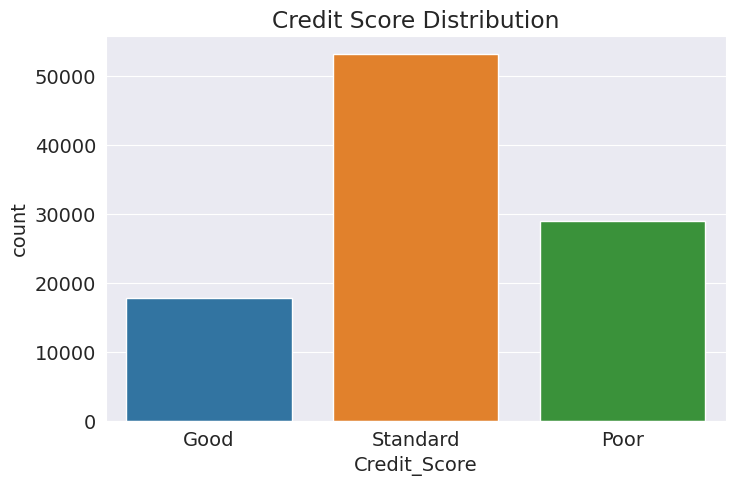

In [31]:
# Target distribution
plt.figure(figsize=(8,5))
sns.countplot(x='Credit_Score', data=train_df)
plt.title('Credit Score Distribution')
plt.show()

In [32]:
px.histogram(train_df, 
             x='Outstanding_Debt', 
             title='Outstanding_Debt vs Credit_Score', 
             color='Credit_Score')

In [33]:
px.scatter(train_df, 
           title='Monthly_Balance vs Annual_Income',
           x='Monthly_Balance', 
           y='Annual_Income', 
           color='Credit_Score')

In [34]:
fig = px.histogram(train_df, 
                   x='Age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

*The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as other ages.*

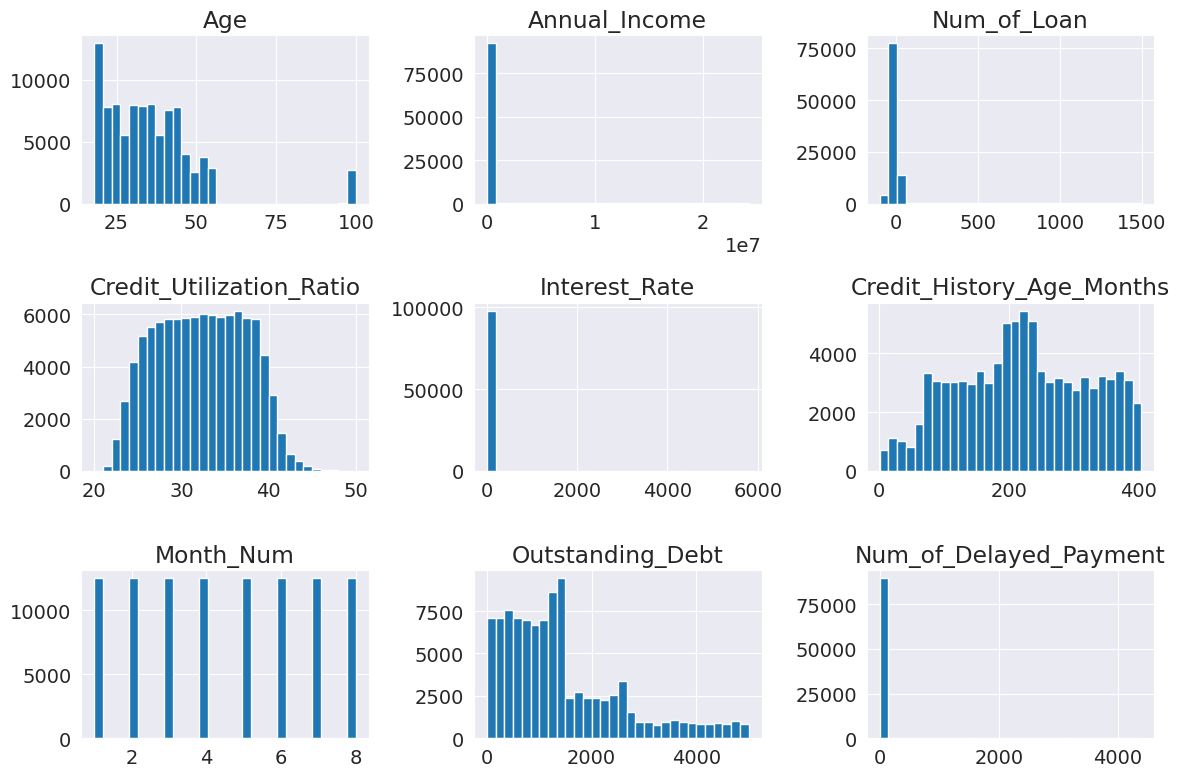

In [35]:
# Numerical features distribution
num_cols = ['Age', 'Annual_Income', 'Num_of_Loan', 'Credit_Utilization_Ratio','Interest_Rate','Credit_History_Age_Months','Month_Num','Outstanding_Debt','Num_of_Delayed_Payment']
train_df[num_cols].hist(bins=30, figsize=(12,8))
plt.tight_layout()
plt.show()

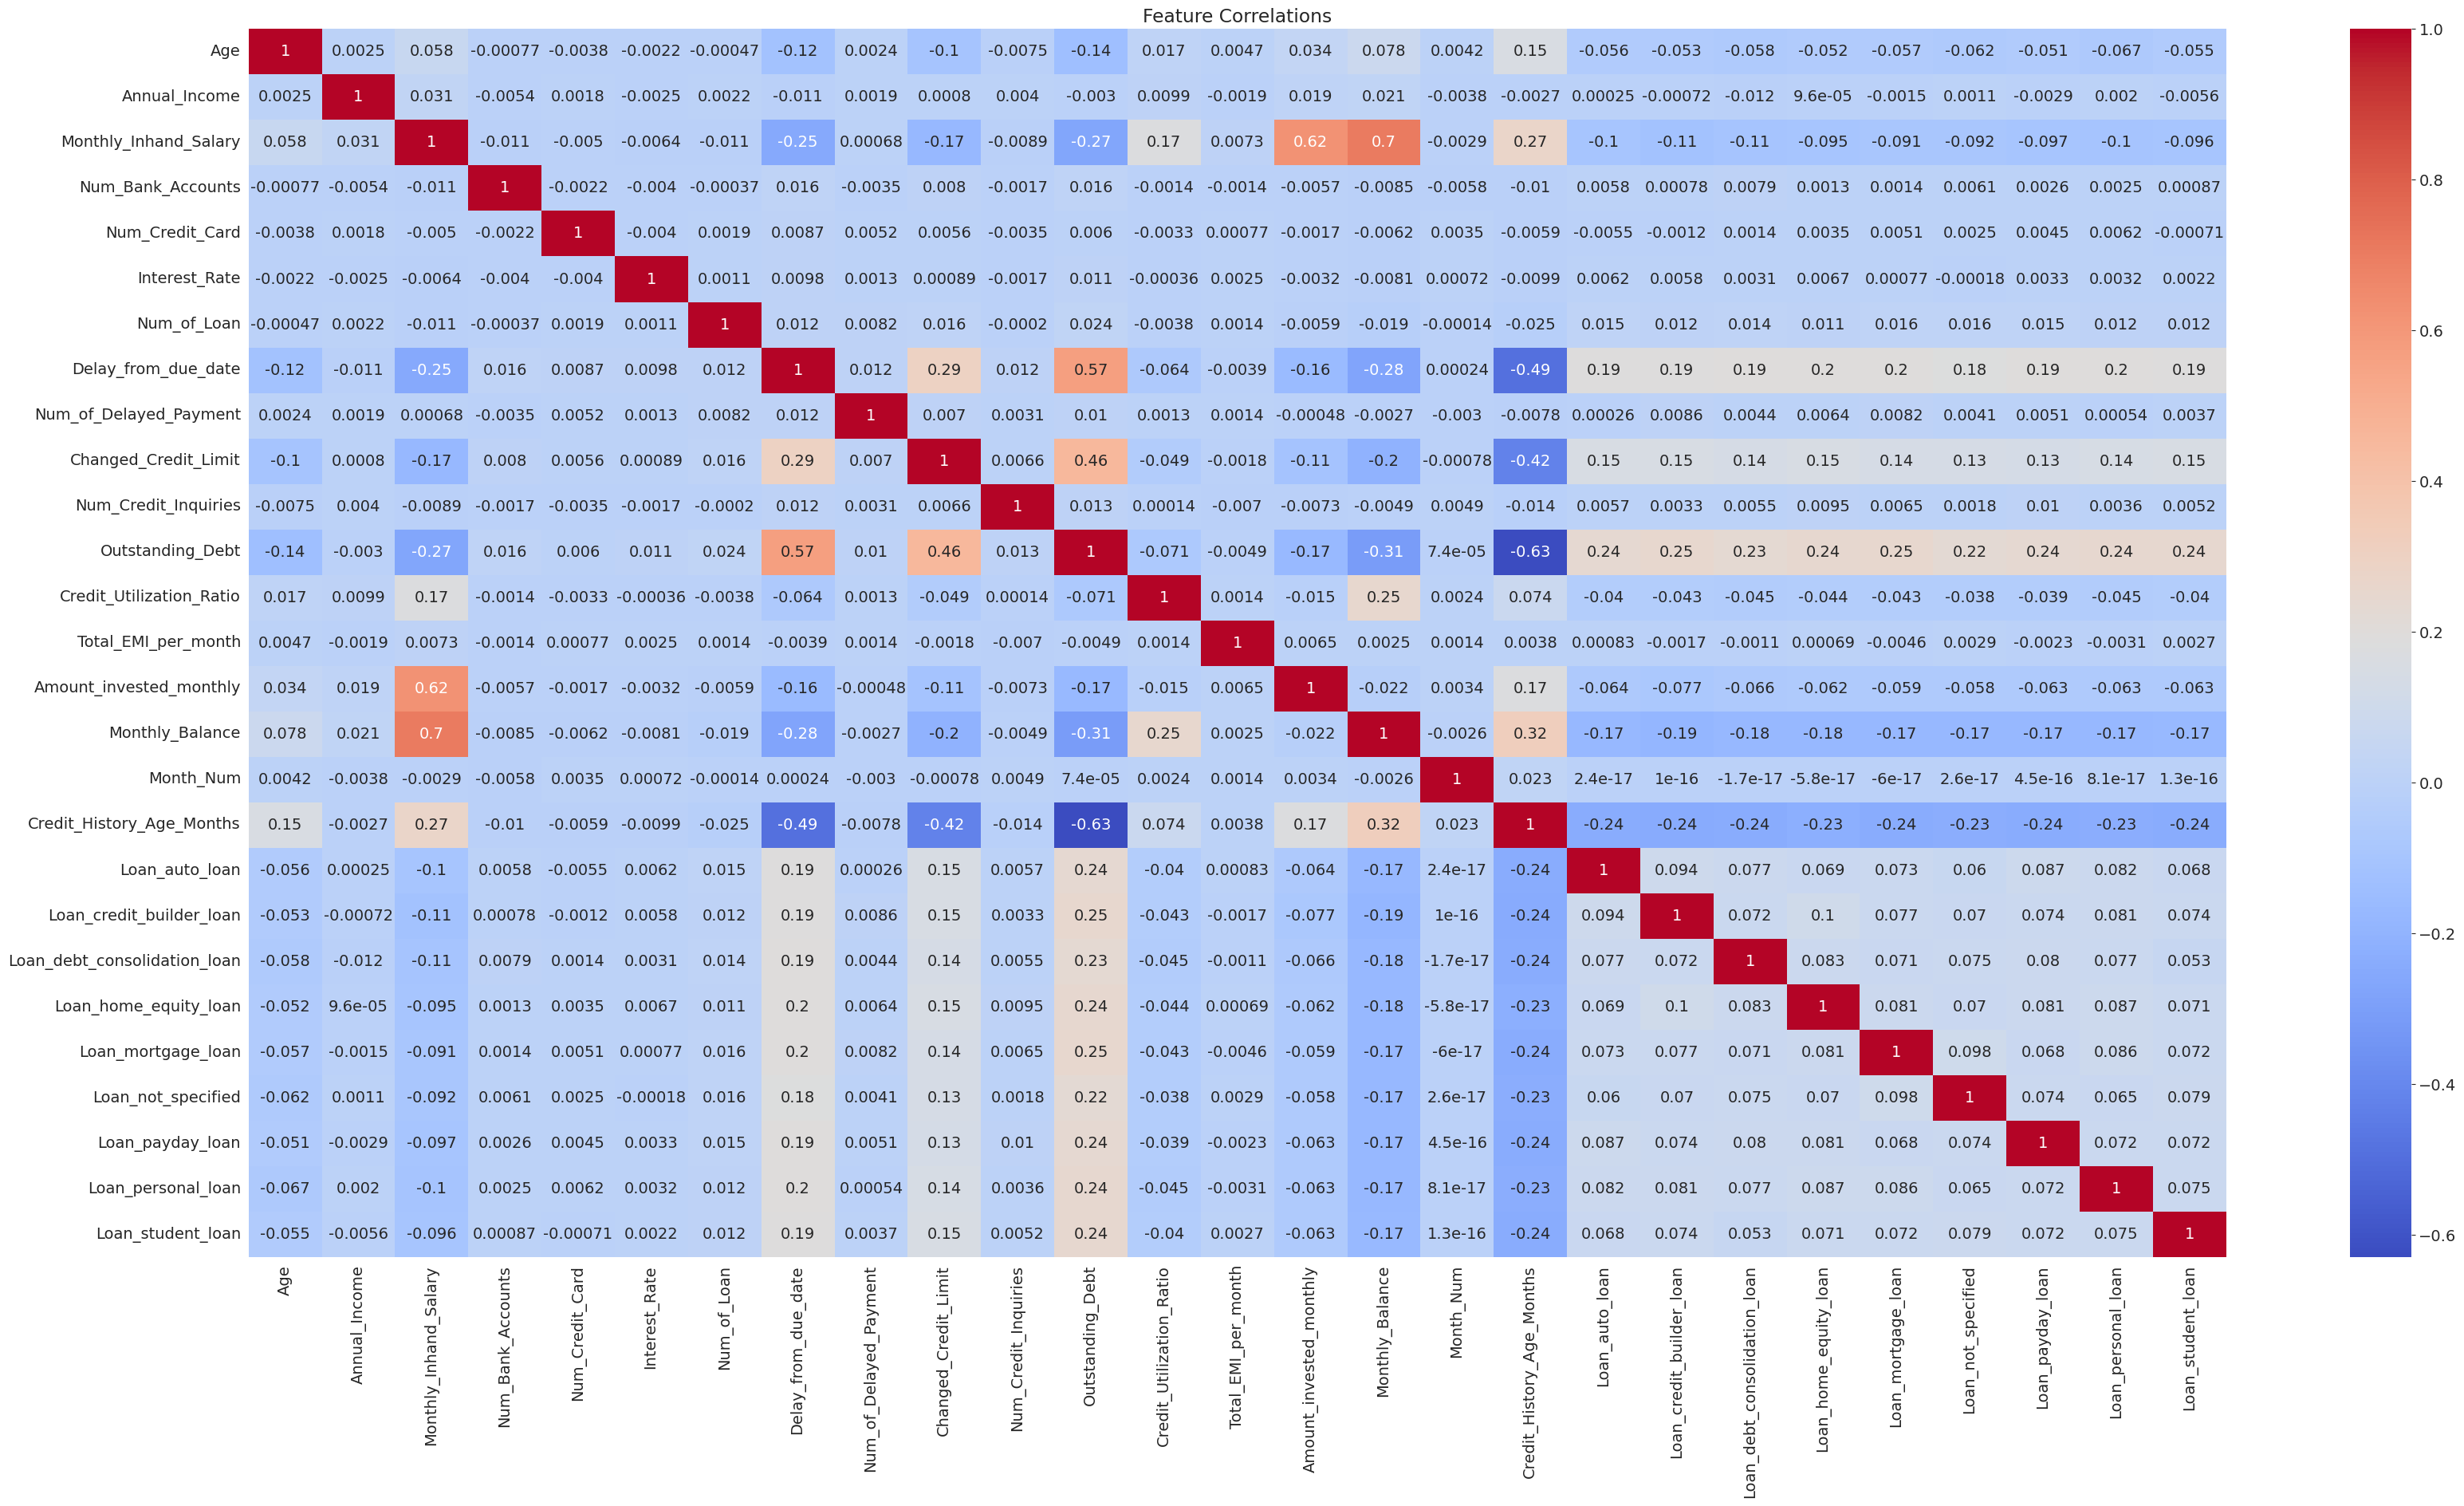

In [36]:
# Correlation matrix
plt.figure(figsize=(40,20))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

## Identifying Input and Target Columns

In [37]:
train_df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Month_Num', 'Credit_History_Age_Months',
       'Loan_auto_loan', 'Loan_credit_builder_loan',
       'Loan_debt_consolidation_loan', 'Loan_home_equity_loan',
       'Loan_mortgage_loan', 'Loan_not_specified', 'Loan_payday_loan',
       'Loan_personal_loan', 'Loan_student_loan'],
      dtype='object')

In [38]:
train_df.dtypes

ID                               object
Customer_ID                      object
Month                            object
Name                             object
Age                             float64
SSN                              object
Occupation                       object
Annual_Income                   float64
Monthly_Inhand_Salary           float64
Num_Bank_Accounts                 int64
Num_Credit_Card                   int64
Interest_Rate                     int64
Num_of_Loan                     float64
Type_of_Loan                     object
Delay_from_due_date               int64
Num_of_Delayed_Payment          float64
Changed_Credit_Limit            float64
Num_Credit_Inquiries            float64
Credit_Mix                       object
Outstanding_Debt                float64
Credit_Utilization_Ratio        float64
Credit_History_Age               object
Payment_of_Min_Amount            object
Total_EMI_per_month             float64
Amount_invested_monthly         float64


In [39]:
input_cols= ['Age', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
        'Month_Num', 'Credit_History_Age_Months',
       'Loan_auto_loan', 'Loan_credit_builder_loan',
       'Loan_debt_consolidation_loan', 'Loan_home_equity_loan',
       'Loan_mortgage_loan', 'Loan_not_specified', 'Loan_payday_loan',
       'Loan_personal_loan', 'Loan_student_loan']

target_col = 'Credit_Score'

In [40]:
print(input_cols)

['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Month_Num', 'Credit_History_Age_Months', 'Loan_auto_loan', 'Loan_credit_builder_loan', 'Loan_debt_consolidation_loan', 'Loan_home_equity_loan', 'Loan_mortgage_loan', 'Loan_not_specified', 'Loan_payday_loan', 'Loan_personal_loan', 'Loan_student_loan']


## Create a `validation dataset` from our `train_df`

In [41]:
len(train_df)

100000

In [42]:
train_size = int(.75 * len(train_df))
train_size

75000

In [43]:
train_df, val_df = train_df[:train_size], train_df[train_size:]

In [44]:
len(train_df), len(val_df)

(75000, 25000)

In [45]:
val_df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater



ID Customer_ID     Month           Name   Age          SSN  \
75000  0x1cd76  CUS_0x3a85   January  Nate Raymondo  28.0  058-58-1144   
75001  0x1cd77  CUS_0x3a85  February            NaN  28.0  058-58-1144   
75002  0x1cd78  CUS_0x3a85     March  Nate Raymondo  28.0  058-58-1144   
75003  0x1cd79  CUS_0x3a85     April  Nate Raymondo  28.0  058-58-1144   
75004  0x1cd7a  CUS_0x3a85       May  Nate Raymondo  29.0  058-58-1144   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
75000        NaN       12731.78            1246.981667                  6   
75001   Musician       12731.78            1246.981667                  6   
75002   Musician       12731.78                    NaN                  6   
75003   Musician            NaN            1246.981667                  6   
75004   Musician       12731.78            1246.981667                  6   

       Num_Credit_Card  Interest_Rate  Num_of_Loan Type_of_Loan  \
75000                5              8          NaN          NaN   
75001                5              8          0.0          NaN   
75002                5              8          0.0          NaN   
75003                5              8          0.0          NaN   
75004                5              8          0.0          NaN   

       Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
75000                   15                    17.0                  12.0   
75001                   22                    15.0                  12.0   
75002                   17                    15.0                   7.0   
75003                   17                    15.0                  11.0   
75004                   17                    15.0                  12.0   

       Num_Credit_Inquiries Credit_Mix  Outstanding_Debt  \
75000                   0.0        NaN               NaN   
75001                   0.0   Standard             80.09   
75002                   2.0        NaN             80.09   
75003                   2.0   Standard             80.09   
75004                   NaN   Standard             80.09   

       Credit_Utilization_Ratio      Credit_History_Age Payment_of_Min_Amount  \
75000                 29.533419  15 Years and 10 Months                    No   
75001                 30.054481  15 Years and 11 Months                    No   
75002                 26.558198   16 Years and 0 Months                    No   
75003                 38.224678   16 Years and 1 Months                    No   
75004                 26.837033   16 Years and 2 Months                    No   

       Total_EMI_per_month  Amount_invested_monthly  \
75000                  0.0               121.958736   
75001                  0.0                      NaN   
75002                  0.0               129.621672   
75003                  0.0                39.228977   
75004                  0.0                88.583567   

                      Payment_Behaviour  Monthly_Balance Credit_Score  \
75000    Low_spent_Small_value_payments       292.739431     Standard   
75001    Low_spent_Small_value_payments       259.537087     Standard   
75002    Low_spent_Small_value_payments       285.076495     Standard   
75003  High_spent_Medium_value_payments       335.469189         Good   
75004   Low_spent_Medium_value_payments       316.114600         Good   

       Month_Num  Credit_History_Age_Months  Loan_auto_loan  \
75000          1                      190.0               0   
75001          2                      191.0               0   
75002          3                      192.0               0   
75003          4                      193.0               0   
75004          5                      194.0               0   

       Loan_credit_builder_loan  Loan_debt_consolidation_loan  \
75000                         0                             0   
75001                         0                             0   
75002                         0                     

## Lets put in the input cols and target col into the train_df, val_df and test_df

We can now create inputs and targets for the training, validation and test sets for further processing and model training.

In [46]:
# Training dataset inputs and target

train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy() 


# Validation dataset inputs and target

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()


# Testing dataset inputs 
## Our test_df didn't come with target_Col
test_inputs = test_df[input_cols].copy()

## Identify numerical and categorical Columns

Let's also identify which of the columns are numerical and which ones are categorical. This will be useful later, as we'll need to convert the categorical data to numbers for training a logistic regression model.

In [47]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [48]:
numeric_cols

['Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance',
 'Month_Num',
 'Credit_History_Age_Months',
 'Loan_auto_loan',
 'Loan_credit_builder_loan',
 'Loan_debt_consolidation_loan',
 'Loan_home_equity_loan',
 'Loan_mortgage_loan',
 'Loan_not_specified',
 'Loan_payday_loan',
 'Loan_personal_loan',
 'Loan_student_loan']

In [49]:
categorical_cols

['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

In [50]:
train_inputs[numeric_cols].isnull().sum()

Age                              3700
Annual_Income                    5236
Monthly_Inhand_Salary           11224
Num_Bank_Accounts                   0
Num_Credit_Card                     0
Interest_Rate                       0
Num_of_Loan                      3605
Delay_from_due_date                 0
Num_of_Delayed_Payment           7290
Changed_Credit_Limit             1566
Num_Credit_Inquiries             1431
Outstanding_Debt                  750
Credit_Utilization_Ratio            0
Total_EMI_per_month                 0
Amount_invested_monthly          6568
Monthly_Balance                   902
Month_Num                           0
Credit_History_Age_Months        6795
Loan_auto_loan                      0
Loan_credit_builder_loan            0
Loan_debt_consolidation_loan        0
Loan_home_equity_loan               0
Loan_mortgage_loan                  0
Loan_not_specified                  0
Loan_payday_loan                    0
Loan_personal_loan                  0
Loan_student

In [51]:
train_inputs[categorical_cols].nunique()

Occupation               15
Credit_Mix                3
Payment_of_Min_Amount     3
Payment_Behaviour         6
dtype: int64

In [52]:
train_inputs[numeric_cols].describe()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  71300.000000   6.976400e+04           63776.000000       75000.000000   
mean      35.357153   1.783650e+05            4185.153307          17.242240   
std       15.150497   1.444892e+06            3187.075150         118.449153   
min       18.000000   7.005930e+03             319.556250          -1.000000   
25%       25.000000   1.936333e+04            1623.593333           3.000000   
50%       33.000000   3.734616e+04            3074.170000           6.000000   
75%       42.000000   7.258062e+04            5935.242676           7.000000   
max      100.000000   2.419806e+07           15204.633333        1798.000000   

       Num_Credit_Card  Interest_Rate   Num_of_Loan  Delay_from_due_date  \
count     75000.000000   75000.000000  71395.000000         75000.000000   
mean         22.721667      71.820827      2.851922            21.111600   
std         130.333821     462.999522     63.088974            14.848348   
min           0.000000       1.000000   -100.000000            -5.000000   
25%           4.000000       8.000000      1.000000            10.000000   
50%           6.000000      14.000000      3.000000            18.000000   
75%           7.000000      20.000000      5.000000            28.000000   
max        1499.000000    5797.000000   1496.000000            67.000000   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
count            67710.000000          73434.000000          73569.000000   
mean                30.295259             10.370430             27.338458   
std                220.941643              6.803319            189.899546   
min                 -3.000000             -6.490000              0.000000   
25%                  9.000000              5.270000              3.000000   
50%                 14.000000              9.370000              6.000000   
75%                 18.000000             14.900000              9.000000   
max               4397.000000             36.970000           2597.000000   

       Outstanding_Debt  Credit_Utilization_Ratio  Total_EMI_per_month  \
count      74250.000000              75000.000000         75000.000000   
mean        1427.597552                 32.304063          1402.288511   
std         1158.661144                  5.116322          8316.704764   
min            0.540000                 20.000000             0.000000   
25%          563.280000                 28.068191            30.628576   
50%         1164.470000                 32.344517            69.432414   
75%         1954.372500                 36.509856           160.970391   
max         4998.070000                 50.000000         82256.000000   

       Amount_invested_monthly  Monthly_Balance     Month_Num  \
count             68432.000000     74098.000000  75000.000000   
mean                195.318413       402.003904      4.500000   
std                 199.709238       213.291188      2.291303   
min                   0.000000         0.007760      1.000000   
25%                  72.070572       270.216456      2.750000   
50%                 128.750256       336.561056      4.500000   
75%                 236.044753       469.289746      6.250000   
max                1977.326102      1602.040519      8.000000   

       Credit_History_Age_Months  Loan_auto_loan  Loan_credit_builder_loan  \
count               68205.000000    75000.000000              75000.000000   
mean                  220.919771        0.308160                  0.318400   
std                    99.774822        0.461736                  0.465859   
min                     1.000000        0.000000                  0.000000   
25%                   144.000000        0.000000                  0.000000   
50%                   219.000000        0.000000                  0.000000   
75%                   302.000000        1.000000                  1.000000   
max                   404.000000       

## Imputing Missing Numeric Data

Machine learning models can't work with missing numerical data. The process of filling missing values is called imputation.

<img src="https://i.imgur.com/W7cfyOp.png" width="480">

There are several techniques for imputation, but we'll use the most basic one: replacing missing values with the average value in the column using the `SimpleImputer` class from `sklearn.impute`.

In [53]:
from sklearn.impute import SimpleImputer

In [54]:
imputer = SimpleImputer(strategy='mean')

In [55]:
imputer.fit(train_inputs[numeric_cols])

SimpleImputer()

In [56]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [57]:
train_inputs[numeric_cols].isnull().sum()

Age                             0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Total_EMI_per_month             0
Amount_invested_monthly         0
Monthly_Balance                 0
Month_Num                       0
Credit_History_Age_Months       0
Loan_auto_loan                  0
Loan_credit_builder_loan        0
Loan_debt_consolidation_loan    0
Loan_home_equity_loan           0
Loan_mortgage_loan              0
Loan_not_specified              0
Loan_payday_loan                0
Loan_personal_loan              0
Loan_student_loan               0
dtype: int64

## Scaling Values in the range of (0,1)

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
scaler = MinMaxScaler().fit(train_inputs[numeric_cols])

In [60]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [61]:
train_inputs[numeric_cols]

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      0.060976       0.000501               0.101127           0.002223   
1      0.060976       0.000501               0.259696           0.002223   
2      1.000000       0.000501               0.259696           0.002223   
3      0.060976       0.000501               0.259696           0.002223   
4      0.060976       0.000501               0.101127           0.002223   
...         ...            ...                    ...                ...   
74995  0.268293       0.007084               0.609358           0.002223   
74996  0.268293       0.004289               0.609358           0.002223   
74997  0.268293       0.004289               0.609358           0.002223   
74998  0.280488       0.004289               0.609358           0.002223   
74999  0.280488       0.004289               0.609358           0.002223   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0             0.002668       0.000345     0.065163             0.111111   
1             0.002668       0.000345     0.065163             0.055556   
2             0.002668       0.000345     0.065163             0.111111   
3             0.002668       0.000345     0.065163             0.138889   
4             0.002668       0.000345     0.065163             0.152778   
...                ...            ...          ...                  ...   
74995         0.003336       0.002933     0.062657             0.361111   
74996         0.003336       0.002933     0.062657             0.361111   
74997         0.003336       0.002933     0.062657             0.375000   
74998         0.003336       0.002933     0.062657             0.361111   
74999         0.003336       0.002933     0.062657             0.305556   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0                    0.002273              0.408652              0.001540   
1                    0.007567              0.408652              0.001540   
2                    0.002273              0.387953              0.001540   
3                    0.001591              0.293603              0.001540   
4                    0.007567              0.408652              0.001540   
...                       ...                   ...                   ...   
74995                0.003409              0.390474              0.002695   
74996                0.004091              0.390474              0.002695   
74997                0.007567              0.390474              0.002695   
74998                0.004091              0.390474              0.002695   
74999                0.007567              0.390474              0.002695   

       Outstanding_Debt  Credit_Utilization_Ratio  Total_EMI_per_month  \
0              0.161968                  0.227421             0.000603   
1              0.161968                  0.398165             0.000603   
2              0.161968                  0.286978             0.000603   
3              0.161968                  0.379262             0.000603   
4              0.161968                  0.159912             0.000603   
...                 ...                       ...                  ...   
74995          0.096085                  0.711698             0.000000   
74996          0.096085                  0.185338             0.000000   
74997          0.096085                  0.478538             0.000000   
74998          0.096085                  0.457190             0.000000   
74999          0.096085                  0.276743             0.000000   

       Amount_invested_monthly  Monthly_Balance  Month_Num  \
0                     0.040669         0.195056   0.000000   
1                     0.059818         0.177663   0.142857   
2                     0.041318         0.206739   0.285714   
3                     0.100873         0.139475   0.428571   
4                     0.020948         0.213155   0.571429   
...         

## Encoding Categorical Data

Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column. 

In [62]:
categorical_cols

['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

In [63]:
from sklearn.preprocessing import OneHotEncoder

In [64]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [65]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [66]:
train_inputs.head()

Age Occupation  Annual_Income  Monthly_Inhand_Salary  \
0  0.060976  Scientist       0.000501               0.101127   
1  0.060976  Scientist       0.000501               0.259696   
2  1.000000  Scientist       0.000501               0.259696   
3  0.060976  Scientist       0.000501               0.259696   
4  0.060976  Scientist       0.000501               0.101127   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0           0.002223         0.002668       0.000345     0.065163   
1           0.002223         0.002668       0.000345     0.065163   
2           0.002223         0.002668       0.000345     0.065163   
3           0.002223         0.002668       0.000345     0.065163   
4           0.002223         0.002668       0.000345     0.065163   

   Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
0             0.111111                0.002273              0.408652   
1             0.055556                0.007567              0.408652   
2             0.111111                0.002273              0.387953   
3             0.138889                0.001591              0.293603   
4             0.152778                0.007567              0.408652   

   Num_Credit_Inquiries Credit_Mix  Outstanding_Debt  \
0               0.00154        NaN          0.161968   
1               0.00154       Good          0.161968   
2               0.00154       Good          0.161968   
3               0.00154       Good          0.161968   
4               0.00154       Good          0.161968   

   Credit_Utilization_Ratio Payment_of_Min_Amount  Total_EMI_per_month  \
0                  0.227421                    No             0.000603   
1                  0.398165                    No             0.000603   
2                  0.286978                    No             0.000603   
3                  0.379262                    No             0.000603   
4                  0.159912                    No             0.000603   

   Amount_invested_monthly                 Payment_Behaviour  Monthly_Balance  \
0                 0.040669   High_spent_Small_value_payments         0.195056   
1                 0.059818    Low_spent_Large_value_payments         0.177663   
2                 0.041318   Low_spent_Medium_value_payments         0.206739   
3                 0.100873    Low_spent_Small_value_payments         0.139475   
4                 0.020948  High_spent_Medium_value_payments         0.213155   

   Month_Num  Credit_History_Age_Months  Loan_auto_loan  \
0   0.000000                   0.655087             1.0   
1   0.142857                   0.545707             1.0   
2   0.285714                   0.660050             1.0   
3   0.428571                   0.662531             1.0   
4   0.571429                   0.665012             1.0   

   Loan_credit_builder_loan  Loan_debt_consolidation_loan  \
0                       1.0                           0.0   
1                       1.0                           0.0   
2                       1.0                           0.0   
3                       1.0                           0.0   
4                       1.0                           0.0   

   Loan_home_equity_loan  Loan_mortgage_loan  Loan_not_specified  \
0                    1.0                 0.0                 0.0   
1                    1.0                 0.0                 0.0   
2                    1.0                 0.0                 0.0   
3                    1.0                 0.0                 0.0   
4                    1.0                 0.0                 0.0   

   Loan_payday_loan  Loan_personal_loan  Loan_student_loan  \
0               0.0                 1.0                0.0   
1               0.0                 1.0                0.0   
2               0.0                 1.0                0.0   
3               0.0                 1.0                0.0   
4               0.0                 1.0                0.0   

  

In [67]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [68]:
X_train

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      0.060976       0.000501               0.101127           0.002223   
1      0.060976       0.000501               0.259696           0.002223   
2      1.000000       0.000501               0.259696           0.002223   
3      0.060976       0.000501               0.259696           0.002223   
4      0.060976       0.000501               0.101127           0.002223   
...         ...            ...                    ...                ...   
74995  0.268293       0.007084               0.609358           0.002223   
74996  0.268293       0.004289               0.609358           0.002223   
74997  0.268293       0.004289               0.609358           0.002223   
74998  0.280488       0.004289               0.609358           0.002223   
74999  0.280488       0.004289               0.609358           0.002223   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0             0.002668       0.000345     0.065163             0.111111   
1             0.002668       0.000345     0.065163             0.055556   
2             0.002668       0.000345     0.065163             0.111111   
3             0.002668       0.000345     0.065163             0.138889   
4             0.002668       0.000345     0.065163             0.152778   
...                ...            ...          ...                  ...   
74995         0.003336       0.002933     0.062657             0.361111   
74996         0.003336       0.002933     0.062657             0.361111   
74997         0.003336       0.002933     0.062657             0.375000   
74998         0.003336       0.002933     0.062657             0.361111   
74999         0.003336       0.002933     0.062657             0.305556   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0                    0.002273              0.408652              0.001540   
1                    0.007567              0.408652              0.001540   
2                    0.002273              0.387953              0.001540   
3                    0.001591              0.293603              0.001540   
4                    0.007567              0.408652              0.001540   
...                       ...                   ...                   ...   
74995                0.003409              0.390474              0.002695   
74996                0.004091              0.390474              0.002695   
74997                0.007567              0.390474              0.002695   
74998                0.004091              0.390474              0.002695   
74999                0.007567              0.390474              0.002695   

       Outstanding_Debt  Credit_Utilization_Ratio  Total_EMI_per_month  \
0              0.161968                  0.227421             0.000603   
1              0.161968                  0.398165             0.000603   
2              0.161968                  0.286978             0.000603   
3              0.161968                  0.379262             0.000603   
4              0.161968                  0.159912             0.000603   
...                 ...                       ...                  ...   
74995          0.096085                  0.711698             0.000000   
74996          0.096085                  0.185338             0.000000   
74997          0.096085                  0.478538             0.000000   
74998          0.096085                  0.457190             0.000000   
74999          0.096085                  0.276743             0.000000   

       Amount_invested_monthly  Monthly_Balance  Month_Num  \
0                     0.040669         0.195056   0.000000   
1                     0.059818         0.177663   0.142857   
2                     0.041318         0.206739   0.285714   
3                     0.100873         0.139475   0.428571   
4                     0.020948         0.213155   0.571429   
...         

## Model Training & Evaluation

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
model = RandomForestClassifier(random_state=42, n_jobs=-1,bootstrap=True,max_samples=0.9,max_features=0.3,max_depth=30,n_estimators=500)

In [71]:
%%time
model.fit(X_train, train_targets)

CPU times: user 5min 27s, sys: 1.69 s, total: 5min 28s
Wall time: 1min 24s


RandomForestClassifier(max_depth=30, max_features=0.3, max_samples=0.9,
                       n_estimators=500, n_jobs=-1, random_state=42)

In [72]:
model.score(X_train, train_targets)

0.9997733333333333

In [73]:
model.score(X_val, val_targets)

0.70736

In [74]:
train_preds = model.predict(X_train)
train_preds

array(['Good', 'Good', 'Good', ..., 'Good', 'Good', 'Good'], dtype=object)

In [75]:
pd.Series(train_preds)

0        Good
1        Good
2        Good
3        Good
4        Good
         ... 
74995    Good
74996    Good
74997    Good
74998    Good
74999    Good
Length: 75000, dtype: object

In [76]:
val_preds = model.predict(X_val)
val_preds

array(['Standard', 'Standard', 'Standard', ..., 'Poor', 'Standard',
       'Poor'], dtype=object)

In [77]:
test_preds = model.predict(X_test)
test_preds

array(['Good', 'Standard', 'Good', ..., 'Poor', 'Standard', 'Poor'],
      dtype=object)

In [78]:
model.classes_

array(['Good', 'Poor', 'Standard'], dtype=object)

In [79]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance',ascending=False)

In [80]:
importance_df.head(10)

feature  importance
11           Outstanding_Debt    0.125538
5               Interest_Rate    0.076713
7         Delay_from_due_date    0.054147
9        Changed_Credit_Limit    0.052682
17  Credit_History_Age_Months    0.046937
44            Credit_Mix_Good    0.038335
13        Total_EMI_per_month    0.037790
15            Monthly_Balance    0.037665
14    Amount_invested_monthly    0.037077
12   Credit_Utilization_Ratio    0.036411

In [81]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

<Axes: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='feature'>

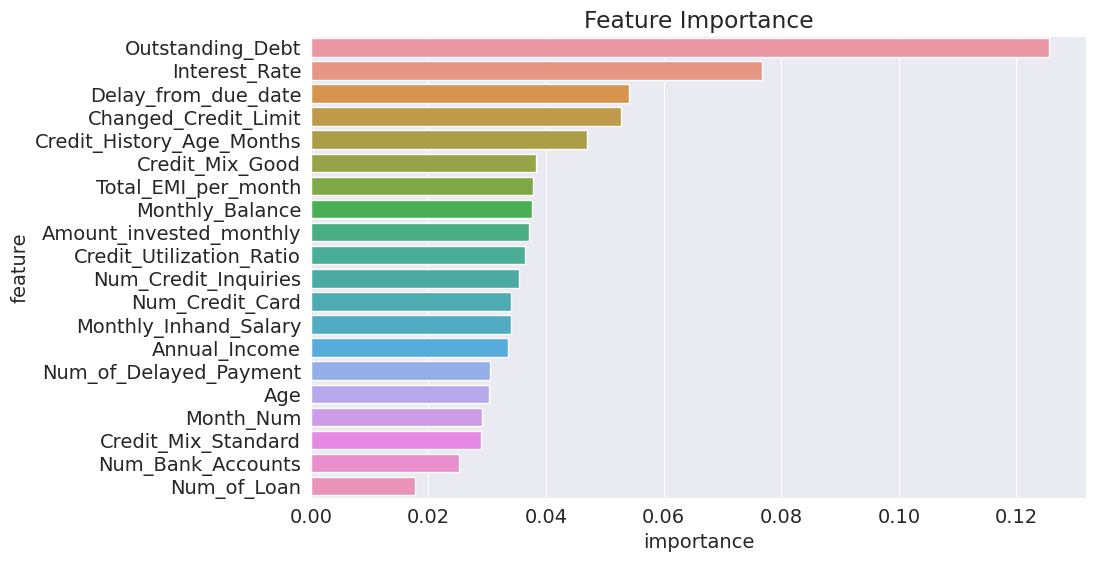

In [82]:
plt.title("Feature Importance")
sns.barplot(data=importance_df.head(20),x='importance', y='feature')